In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats

### Creating Dataframe

In [2]:
data=pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Descriptive Statistics of the given data

In [5]:
def cont_var_summary(x):
    n=x.count()
    nmiss=x.isnull().sum()
    avg=x.mean()
    med=x.median()
    variance=x.var()
    stdev=x.std()
    minimum=x.min()
    p1=x.quantile(0.01)
    p5=x.quantile(0.05)
    p10=x.quantile(0.10)
    p25=x.quantile(0.25)
    p50=x.quantile(0.50)
    p75=x.quantile(0.75)
    p90=x.quantile(0.90)
    p95=x.quantile(0.95)
    p99=x.quantile(0.99)
    maximum=x.max()
    res=pd.Series([n,nmiss,avg,med,variance,stdev,minimum,p1,p5,p10,p25,p50,p75,p90,p95,p99,maximum],index=['N','NMiss','Mean','Median','Variance','Stdev','Minimum','P1','P5','P10','P25','P50','P75','P90','P95','P99','Maximum'])
    return res
    

In [6]:
data.apply(cont_var_summary)

,Hours,Scores
N,25.000000,25.000000
NMiss,0.000000,0.000000
Mean,5.012000,51.480000
Median,4.800000,47.000000
Variance,6.376100,639.426667
Stdev,2.525094,25.286887
Minimum,1.100000,17.000000
P1,1.196000,17.720000
P5,1.580000,20.200000
P10,2.140000,22.200000


#### As no missing values no need for missing values imputation
#### As no significant difference between different quantiles values no need for outlier presence
#### As no categorical variables used in case of independent variables so, no need for dummy variables creation
#### No need for checking for correlation among the different independent variables as their is only one independent variable in the dataset

### Checking for the dependent variable having a normal distribution or not

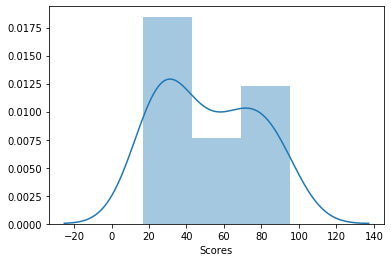

In [7]:
sns.distplot(data.Scores)
plt.show()

### Spliting of data for test and training data

In [8]:
train,test = train_test_split(data,test_size=0.3,random_state=42)

### Linear Regression

In [9]:
mod_val='Scores~Hours'

In [10]:
lm=smf.ols(mod_val,train).fit()

In [11]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     308.6
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           2.05e-11
Time:                        23:46:19   Log-Likelihood:                -53.419
No. Observations:                  17   AIC:                             110.8
Df Residuals:                      15   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7942      3.209      0.871      0.3

C:\Users\jatin\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


## Predicting for training and test datasets

In [12]:
train_pred = lm.predict(train.Hours)
test_pred = lm.predict(test.Hours)

## Evaluating the results

### Root Mean Square Error

In [13]:
train_rmse = np.sqrt(metrics.mean_squared_error(train.Scores,train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(test.Scores,test_pred))
print('RMSE for Train: ',train_rmse)
print('RMSE for Test: ',test_rmse)

RMSE for Train:  5.603419312826169
RMSE for Test:  4.859985351228107


### Correlation

In [14]:
train_corr=stats.stats.pearsonr(train.Scores,train_pred)
test_corr=stats.stats.pearsonr(test.Scores,test_pred)
print('Correlation for Train: ',train_corr)
print('Correlation for Test: ', test_corr)

Correlation for Train:  (0.9765493589107233, 2.047392908123687e-11)
Correlation for Test:  (0.9744568541093069, 4.087011216591463e-05)


### Decile Analysis

In [15]:
train['Pred']=train_pred
train['Deciles']=pd.qcut(train['Pred'],10,labels=False)
predicted=train[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
actual=train[['Deciles','Scores']].groupby(['Deciles']).Scores.mean().sort_values(ascending=False)
train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
train_decile_analysis.columns=['Predicted','Actual']
print('Decile analysis for Train: \n',train_decile_analysis)

Decile analysis for Train: 
          Predicted  Actual
Deciles                   
9        90.674592    91.5
8        81.935105    80.5
7        77.565362    85.0
6        68.340348    68.0
5        56.202172    60.0
4        47.948212    47.5
3        38.237671    32.5
2        33.867928    27.0
1        25.128441    27.0
0        15.417900    18.5


C:\Users\jatin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jatin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#test['Pred']=train_pred
#test['Deciles']=pd.qcut(train['Pred'],10,labels=False)
#predicted=test[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
#actual=train[['Deciles','Scores']].groupby(['Deciles']).Scores.mean().sort_values(ascending=False)
#train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
#train_decile_analysis.columns=['Predicted','Actual']
#print('Decile analysis for Train: \n',train_decile_analysis)

## Visualizing Results

In [17]:
data=pd.concat([train,test],axis=0)
data.sort_values(['Hours','Scores'],inplace=True)

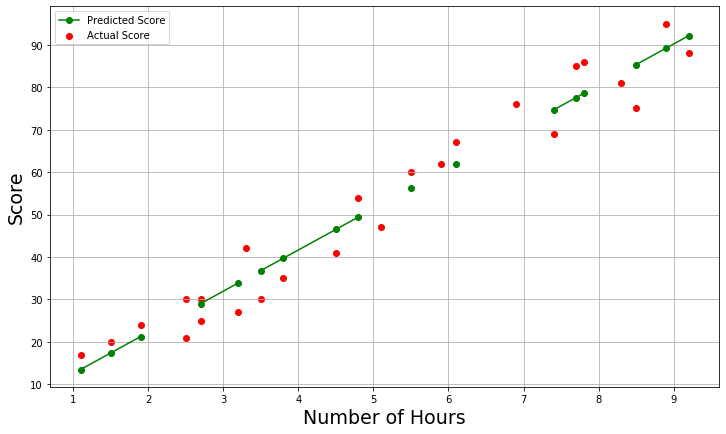

In [18]:
plt.figure(figsize=(12,7))
plt.grid()
plt.scatter(data.Hours,data.Scores,color='red',marker = 'o',label='Actual Score')
plt.plot(data.Hours,data.Pred,color='green',marker='o',label='Predicted Score')
plt.xlabel('Number of Hours', fontsize=19)
plt.ylabel('Score', fontsize=19)
plt.legend()
plt.show()

## Prediction of new data

In [19]:
no_of_hours = float(input("Enter the number of hours a student studies in a day: "))

Enter the number of hours a student studies in a day: 9.25


In [20]:
test_case_ser=pd.DataFrame([no_of_hours])
test_case_ser.columns=['Hours']

In [21]:
prediction=lm.predict(test_case_ser.Hours)

In [22]:
print("For number of hours studied ",no_of_hours,"predicted score in exam is :",prediction)

For number of hours studied  9.25 predicted score in exam is : 0    92.6167
dtype: float64


# Thank You